In this notebook I am going to study the lepton jets kinematics. I study the lepton jet as a whole as well as separating them into egmLjs and muLjs. I consider mainly baseNoLj and base selection. To dig into the unusual behaviour in the electron pt, I also consider three selections which separates egmLjs into three categories.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_0p8mm',
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                  #max_files =1
                                )
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True
)

channels = ["baseNoLj", 
            "base", 
            "base_egmLj_eLj",
            "base_egmLj_gLj",
            "base_egmLj_egLj",
            "baseNoLj_noLoose", 
            "baseNoLj_egLj", 
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"],
    lj_reco_choices=["0.4"],
   
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


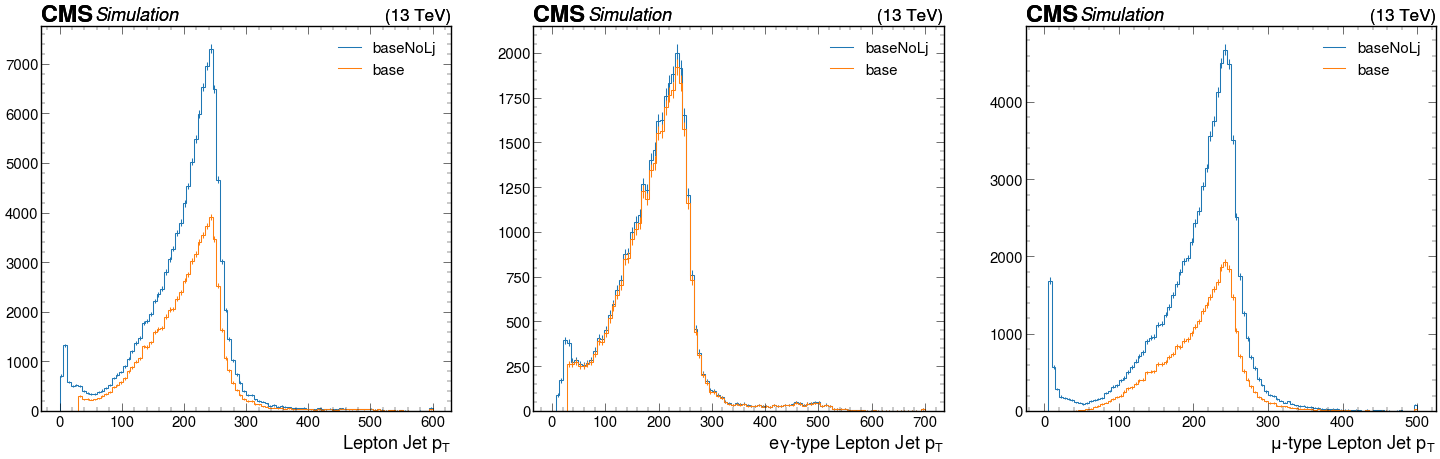

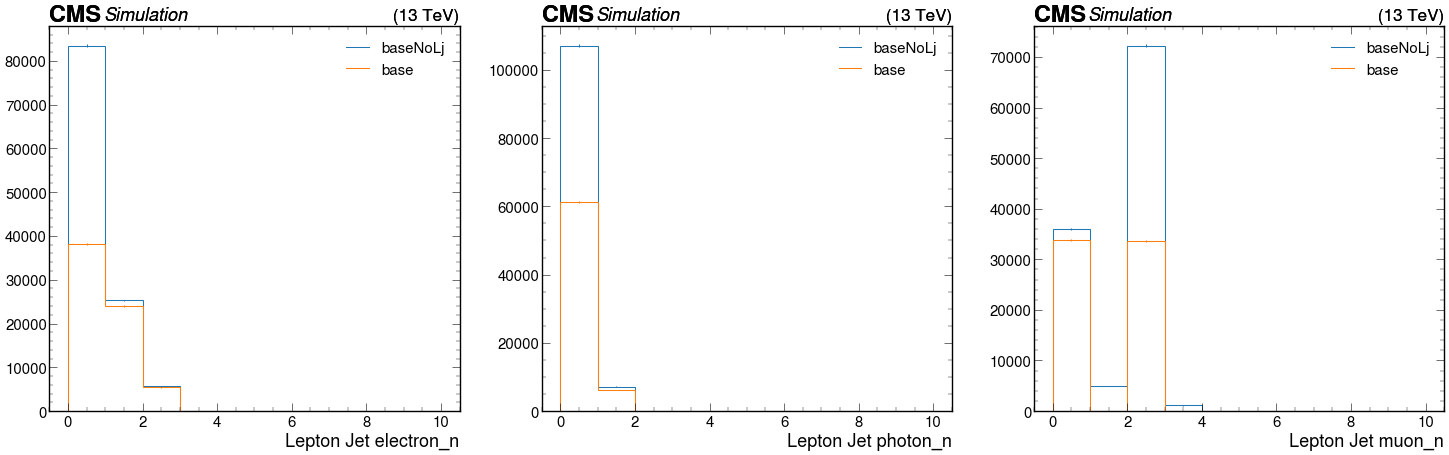

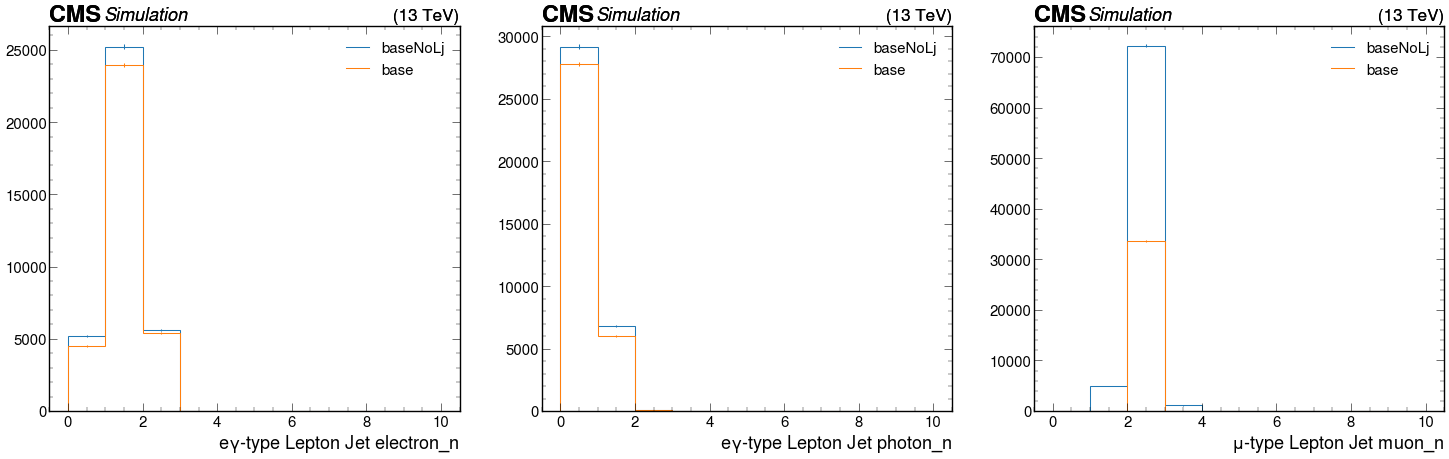

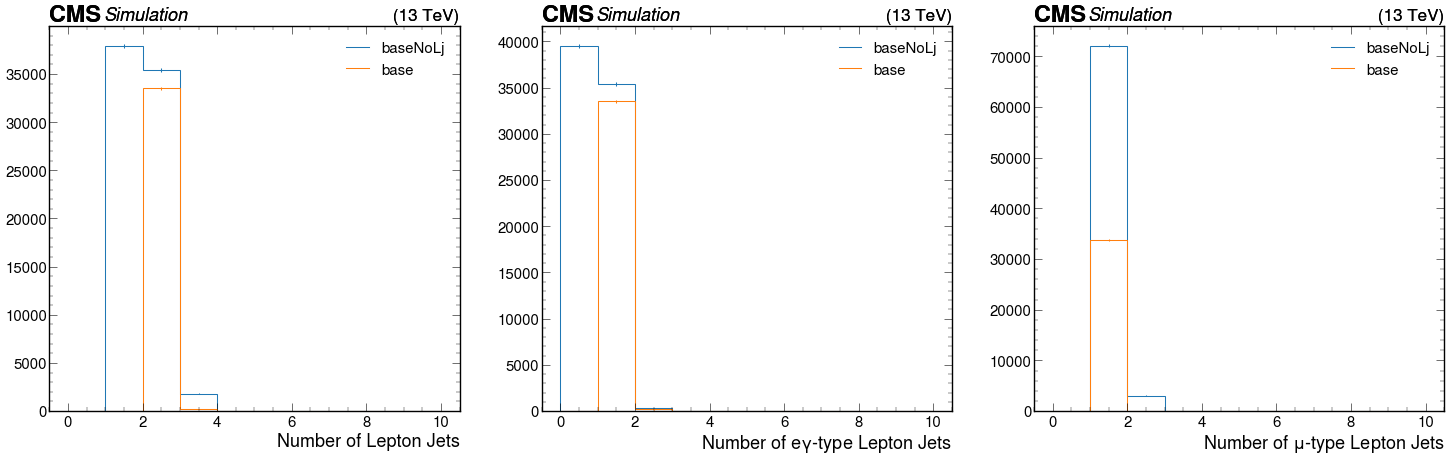

In [3]:
hists = output["out"]["2Mu2E_500GeV_5p0GeV_0p8mm"]["hists"]
channels_list =  ["baseNoLj", "base",]
histograms_list = [
                   "lj_pt", "egm_lj_pt", "mu_lj_pt",
                   "lj_electronN", "lj_photonN", "lj_muonN", 
                   "egm_lj_electronN", "egm_lj_photonN", "mu_lj_muonN",
                   "lj_n", "egm_lj_n", "mu_lj_n",
                 ]
for h in range(len(histograms_list)):
    if h%3 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
        plt.subplot(1, 3, 1)
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], )
            plt.legend(channels_list)
    else:
        plt.subplot(1, 3, (h%3 + 1))
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], )
            plt.legend(channels_list)
        

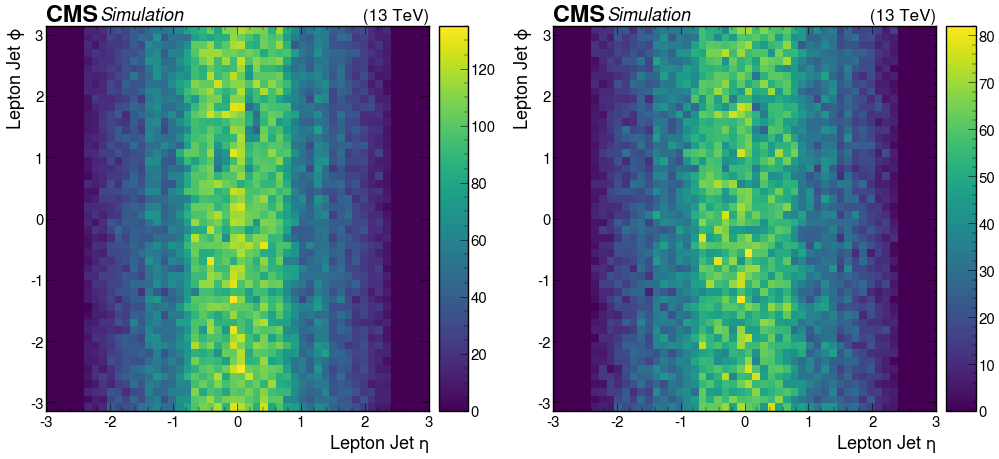

In [4]:
fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
 
for x in range(len(channels_list)):
    plt.subplot(1, 2, x + 1)
    utilities.plot(hists["lj_eta_phi"][channels_list[x],:, :])
    

In [5]:

output["out"][samples[0]]["cutflow"]["base"].print_table(unweighted=True)
output["out"][samples[0]]["cutflow"]["baseNoLj"].print_table(unweighted=True)


cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             194804.0     194804.0
pass triggers             77002.0      77002.0
PV filter                186324.0      75181.0
>=2 LJs                   82273.0      33688.0
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             194804.0     194804.0
pass triggers             77002.0      77002.0
PV filter                186324.0      75181.0


There is something weird going on with the egmlj_pt. We need to look more into that.

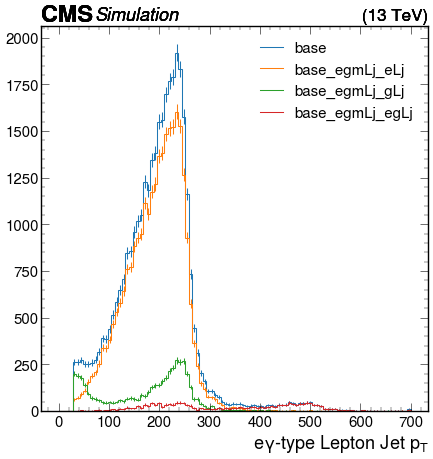

In [6]:
channels_list1 = ["base",
                  "base_egmLj_eLj",
                  "base_egmLj_gLj",
                  "base_egmLj_egLj",
                 ]
for x in range(len(channels_list1)):
    utilities.plot(hists["egm_lj_pt"][channels_list1[x],:],)
plt.legend(channels_list1)
    


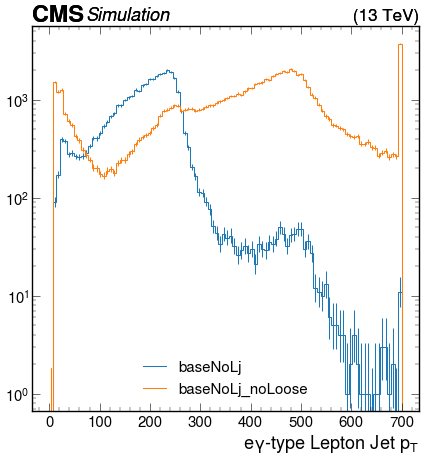

In [7]:
channels_list1 = ["baseNoLj", 
             "baseNoLj_noLoose"]
for x in range(len(channels_list1)):
    utilities.plot(hists["egm_lj_pt"][channels_list1[x],:])
    plt.yscale("log")
plt.legend(channels_list1)
    


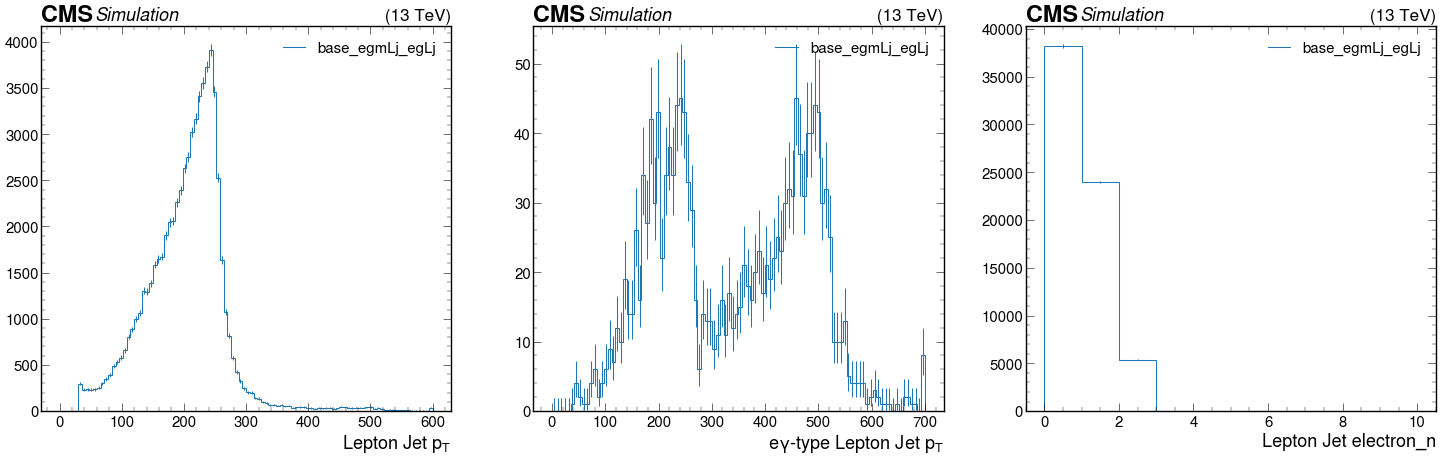

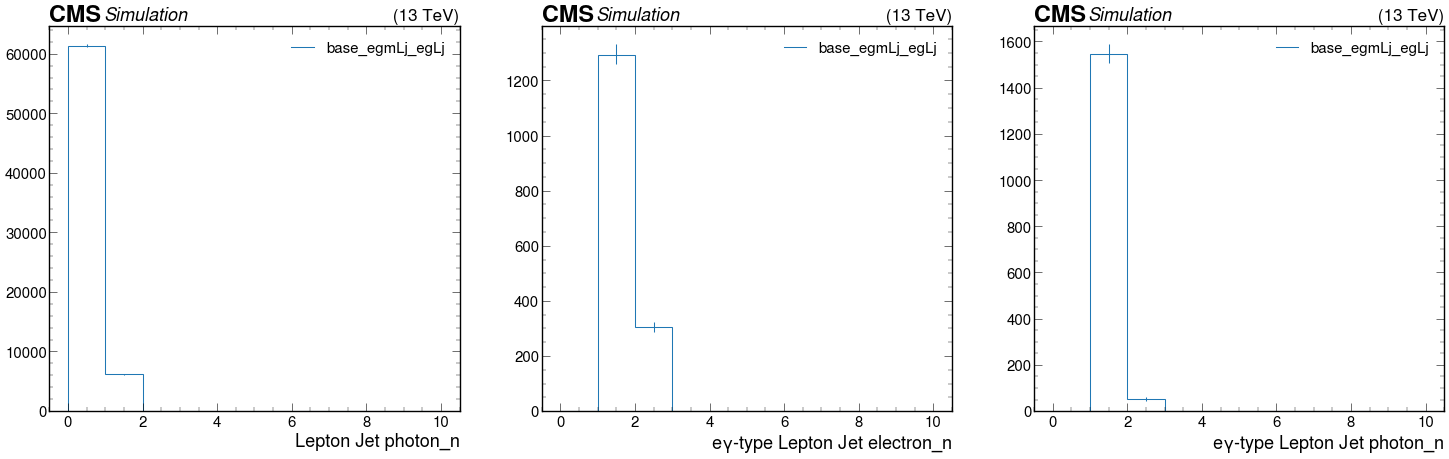

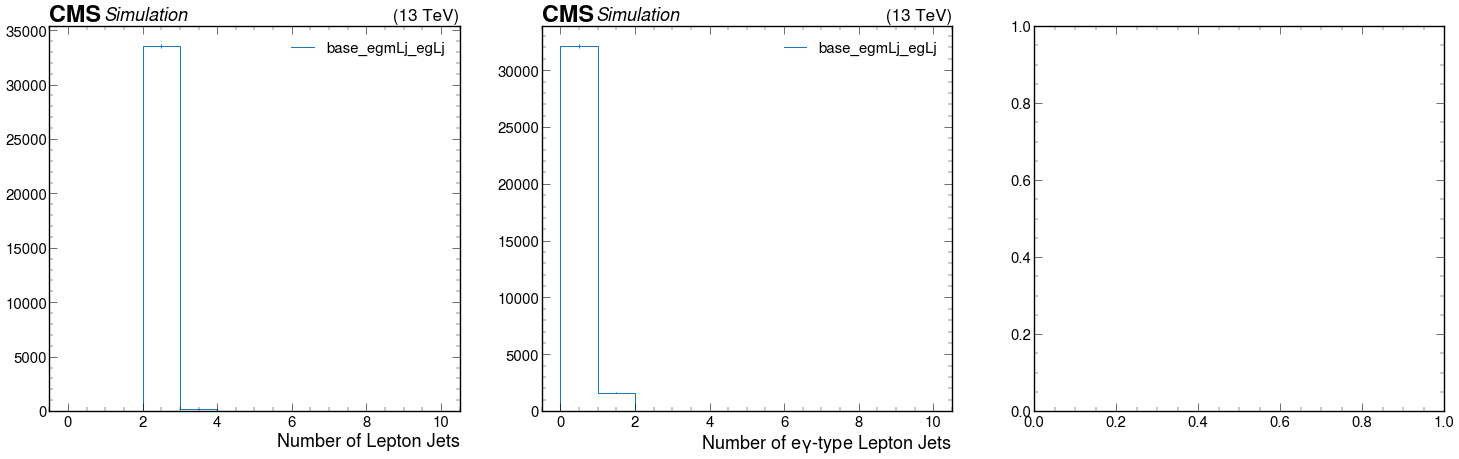

In [8]:
hists = output["out"]["2Mu2E_500GeV_5p0GeV_0p8mm"]["hists"]
channels_list =  ["base_egmLj_egLj"]
histograms_list = [
                   "lj_pt", "egm_lj_pt",
                   "lj_electronN", "lj_photonN",
                   "egm_lj_electronN", "egm_lj_photonN", 
                   "lj_n", "egm_lj_n",
                 ]
for h in range(len(histograms_list)):
    if h%3 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
        plt.subplot(1, 3, 1)
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:],)
            plt.legend(channels_list)
    else:
        plt.subplot(1, 3, (h%3 + 1))
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:],)
            plt.legend(channels_list)
        

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6429d99910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

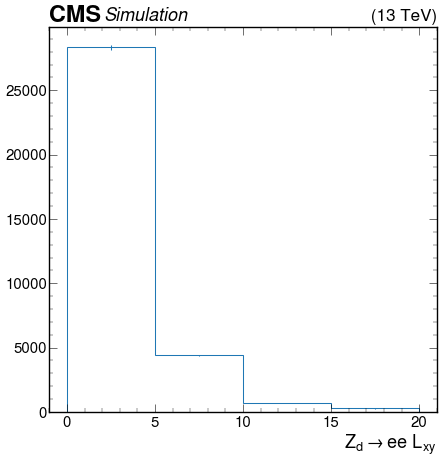

In [9]:
  utilities.plot(hists["genAs_toE_lxy"]["base",:20j], )